# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Mhd Firdaus Alfatah Nst]
- **Email:** [firdaysalfatah@gmail.com]
- **ID Dicoding:** [firdays_alfatah_20cq]

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan jumlah peminjam casual dan peminjam registered tiap bulannya?
- Apakah perubahan musim mempengaruhi jumlah orang yang menyewa sepeda?
- Pada waktu apa user lebih sering menyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

## Data Wrangling

### Gathering Data

##### Membaca file csv

In [61]:
day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')


#### Melihat sample setiap data frame

In [62]:
print("Day data Frame")
day_df.head()

Day data Frame


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [63]:
print("Hour data Frame")
hour_df.head()

Hour data Frame


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [64]:
print("Panjang dari data frame day adalah: ", day_df.shape)
print("Panjang dari data frame hour adalah: ", hour_df.shape)

Panjang dari data frame day adalah:  (731, 16)
Panjang dari data frame hour adalah:  (17379, 17)


**Insight:**
- Data frame day memiliki 731 baris dan 16 kolom
- Data frame day memiliki 17379 baris dan 17 kolom


### Assessing Data

#### Informasi dari stiap data frame

In [65]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [66]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [67]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Mencari missing value di setiap dataframe

In [68]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [69]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Mencari Outlier di setiap data frame

In [70]:
day_df.max()

instant              731
dteday        2012-12-31
season                 4
yr                     1
mnth                  12
holiday                1
weekday                6
workingday             1
weathersit             3
temp            0.861667
atemp           0.840896
hum               0.9725
windspeed       0.507463
casual              3410
registered          6946
cnt                 8714
dtype: object

In [71]:
hour_df.max()

instant            17379
dteday        2012-12-31
season                 4
yr                     1
mnth                  12
hr                    23
holiday                1
weekday                6
workingday             1
weathersit             4
temp                 1.0
atemp                1.0
hum                  1.0
windspeed         0.8507
casual               367
registered           886
cnt                  977
dtype: object

#### Mencari nilai duplikat di setiap data frame

In [72]:
print("Jumlah duplikasi day data frame : ",day_df.duplicated().sum())

Jumlah duplikasi day data frame :  0


In [73]:
print("Jumlah duplikasi hour data frame : ",hour_df.duplicated().sum())

Jumlah duplikasi hour data frame :  0


**Insight:**
- Di dalam kedua data frame  tidak ada missing value
- Di dalam kedua data frame  tidak ada duplikasi data
- Di dalam kedua data frame  tidak ada inacurate value
- Di dalam kedua data frame  tidak ada outlier

### Cleaning Data

#### Mengkonversi tipe data kolom dteday 

In [74]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [75]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### Menghapus kolom holiday karena tidak digunakan

In [76]:
day_df = day_df.drop(columns='holiday')
hour_df = hour_df.drop(columns='holiday')
day_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

#### Mengubah nilai temp, atemp, hum, dan windspeed ke satuan aslinya

In [77]:
def convert_to_original(df):
    if df['temp'].max() < 1: 
        df['temp'] = round(df['temp'] * 41)
        df['atemp'] = round(df['atemp'] * 50)
        df['hum'] = round(df['hum'] * 67)
        df['windspeed'] = round(df['windspeed'] * 100)
    return df
day_df = convert_to_original(day_df)
hour_df = convert_to_original(hour_df)
day_df.head()

,instant,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,6,0,2,14.0,18.0,54.0,16.0,331,654,985
1,2,2011-01-02,1,0,1,0,0,2,15.0,18.0,47.0,25.0,131,670,801
2,3,2011-01-03,1,0,1,1,1,1,8.0,9.0,29.0,25.0,120,1229,1349
3,4,2011-01-04,1,0,1,2,1,1,8.0,11.0,40.0,16.0,108,1454,1562
4,5,2011-01-05,1,0,1,3,1,1,9.0,11.0,29.0,19.0,82,1518,1600


#### Mengelompokkan jam ke dalam kategori waktu


In [78]:
def time_category(time):
    if 0 <= time <= 11:
        return 'Morning'
    elif 12 <= time <= 16:
        return 'Day'
    elif 17 <= time <= 19:
        return 'Afternoon'
    elif 20 <= time <= 23:
        return 'Night'
hour_df['time_category'] = hour_df.hr.apply(time_category)

hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_category
3164,3165,2011-05-16,2,0,5,18,1,1,3,0.58,0.5455,0.83,0.1940,55,398,453,Afternoon
1743,1744,2011-03-18,1,0,3,8,5,1,1,0.42,0.4242,0.67,0.2537,24,256,280,Morning
16391,16392,2012-11-20,4,1,11,17,2,1,2,0.40,0.4091,0.71,0.1642,37,553,590,Afternoon
2899,2900,2011-05-05,2,0,5,17,4,1,1,0.56,0.5303,0.26,0.3881,66,467,533,Afternoon
2452,2453,2011-04-17,2,0,4,2,0,0,1,0.40,0.4091,0.62,0.1940,4,25,29,Morning


**Insight**
- Mengganti tipe data pada kolom dteday menjadi datetime
- Menghapus kolom holiday karena kolom ini tidak digunakan
- Mengubah kondisi lingkungan menjadi nilai asli sebelum di normalisasi
- Membuat kolom baru di hour_df untuk membuat kategori waktu

## Exploratory Data Analysis (EDA)

#### Descriptive Statistic dalam setiap data frame

In [79]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,2.997264,0.683995,1.395349,20.314637,23.735978,42.075239,19.038304,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,4.000000,0.000000,2.000000,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,1.000000,0.000000,1.000000,14.000000,17.000000,35.000000,13.000000,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,3.000000,1.000000,1.000000,20.000000,24.000000,42.000000,18.000000,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,5.000000,1.000000,2.000000,27.000000,30.000000,49.000000,23.000000,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,6.000000,1.000000,3.000000,35.000000,42.000000,65.000000,51.000000,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,2.004787,0.465233,0.544894,7.531453,8.144756,9.558390,7.767947,686.622488,1560.256377,1937.211452


In [80]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_category
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morning
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8636
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN


#### Grouping berdasarkan season

In [81]:
day_df.groupby(by=['yr', 'season']).agg({
    'instant':'nunique',
    'casual': 'sum',
    'registered': 'sum',
    'cnt': ['min', 'max', 'sum']
})

instant  casual registered   cnt              
          nunique     sum        sum   min   max     sum
yr season                                               
0  1           90   21425     128575   431  3239  150000
   2           92   77564     269752   795  5805  347316
   3           94   95450     324200  1115  6043  419650
   4           89   52813     273324   627  5511  326137
1  1           91   39197     282151   441  7836  321348
   2           92  125958     445315  1027  8362  571273
   3           94  130641     510838  4073  8714  641479
   4           89   76969     438507    22  8555  515476

#### Grouping berdasarkan cuaca

In [82]:
# Dalam bentuk cuaca setiap hari
day_df.groupby(by=['weathersit']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
})

,casual,registered,cnt
weathersit,,,
1,446346,1811606,2257952
2,169776,827082,996858
3,3895,33974,37869


In [83]:
# Dalam bentuk cuaca setiap jam
hour_df.groupby(by=['weathersit']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
})

,casual,registered,cnt
weathersit,,,
1,462745,1875428,2338173
2,134481,661471,795952
3,22783,135548,158331
4,8,215,223


#### Grouping berdasarkan working day

In [84]:
day_df.groupby(by=['yr', 'workingday']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
})

casual  registered      cnt
yr workingday                             
0  0           128898      257941   386839
   1           118354      737910   856264
1  0           187834      425596   613430
   1           184931     1251215  1436146

**Insight:**
- Ketika cuaca sangat buruk jumlah total penyewaan menurun.  

- Pola penyewaan sepeda bagi user casual tidak memiliki perbedaan yang signifikan ketika di hari kerja ataupun hari libur.  

- Sedangkan pola penyewaan sepeda bagi user registered lebih tinggi ketika di hari kerja.  

## Visualization & Explanatory Analysis

In [85]:
daydf_bymonth = day_df.groupby(by=['yr', 'mnth']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()
daydf_bymonth.sample(5)

,yr,mnth,casual,registered,cnt
18,1,7,41705,161902,203607
20,1,9,43778,174795,218573
12,1,1,8969,87775,96744
6,0,7,36452,104889,141341
7,0,8,28842,107849,136691


### Bagaimana perbandingan jumlah peminjam casual dan peminjam registered tiap bulannya?  

#### Rata rata total penyewaan user casual dan registered setiap bulan

In [86]:
avg_casual = day_df['casual'].mean().round()
avg_registered = day_df['registered'].mean().round()
print("Rata-rata user casual: ", avg_casual)
print("Rata-rata user registered: ", avg_registered)

Rata-rata user casual:  848.0
Rata-rata user registered:  3656.0


#### Visualisasi

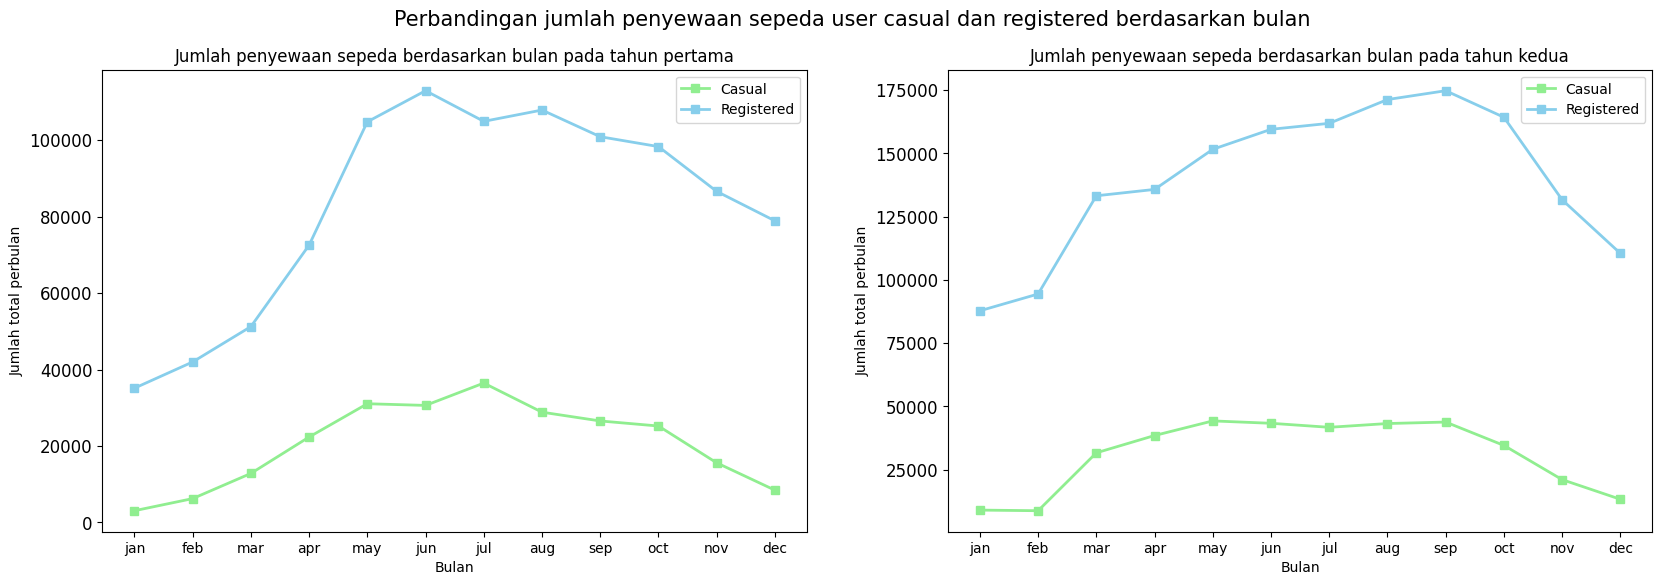

In [87]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

month_name = ['jan', 'feb', 'mar', 'apr', 'may' ,'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Pada tahun pertama
ax[0].plot(daydf_bymonth[daydf_bymonth['yr'] == 0]['mnth'], daydf_bymonth[daydf_bymonth['yr'] == 0]['casual'], marker='s', linewidth=2, color='lightgreen', label='Casual')
ax[0].plot(daydf_bymonth[daydf_bymonth['yr'] == 0]['mnth'], daydf_bymonth[daydf_bymonth['yr'] == 0]['registered'], marker='s', linewidth=2, color='skyblue', label='Registered')
ax[0].set_title('Jumlah penyewaan sepeda berdasarkan bulan pada tahun pertama', loc='center')
ax[0].set_xlabel('Bulan')
ax[0].set_ylabel('Jumlah total perbulan')
ax[0].set_xticks(range(1, 13))
ax[0].set_xticklabels(month_name)
ax[0].legend(loc='upper right')
ax[0].tick_params(axis = 'y', labelsize=12)


# Pada tahun kedua
ax[1].plot(daydf_bymonth[daydf_bymonth['yr'] == 1]['mnth'], daydf_bymonth[daydf_bymonth['yr'] == 1]['casual'], marker='s', linewidth=2, color='lightgreen', label='Casual')
ax[1].plot(daydf_bymonth[daydf_bymonth['yr'] == 1]['mnth'], daydf_bymonth[daydf_bymonth['yr'] == 1]['registered'], marker='s', linewidth=2, color='skyblue', label='Registered')
ax[1].set_title('Jumlah penyewaan sepeda berdasarkan bulan pada tahun kedua', loc='center')
ax[1].set_xlabel('Bulan')
ax[1].set_ylabel('Jumlah total perbulan')
ax[1].set_xticks(range(1, 13))
ax[1].set_xticklabels(month_name)
ax[1].legend(loc='upper right')
ax[1].tick_params(axis = 'y', labelsize=12)

plt.suptitle('Perbandingan jumlah penyewaan sepeda user casual dan registered berdasarkan bulan', fontsize=15)
plt.show()

### Apakah perubahan musim mempengaruhi jumlah orang yang menyewa sepeda?

In [88]:
daydf_byseason = day_df.groupby(by=['yr', 'season']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()
daydf_byseason

,yr,season,casual,registered,cnt
0,0,1,21425,128575,150000
1,0,2,77564,269752,347316
2,0,3,95450,324200,419650
3,0,4,52813,273324,326137
4,1,1,39197,282151,321348
5,1,2,125958,445315,571273
6,1,3,130641,510838,641479
7,1,4,76969,438507,515476


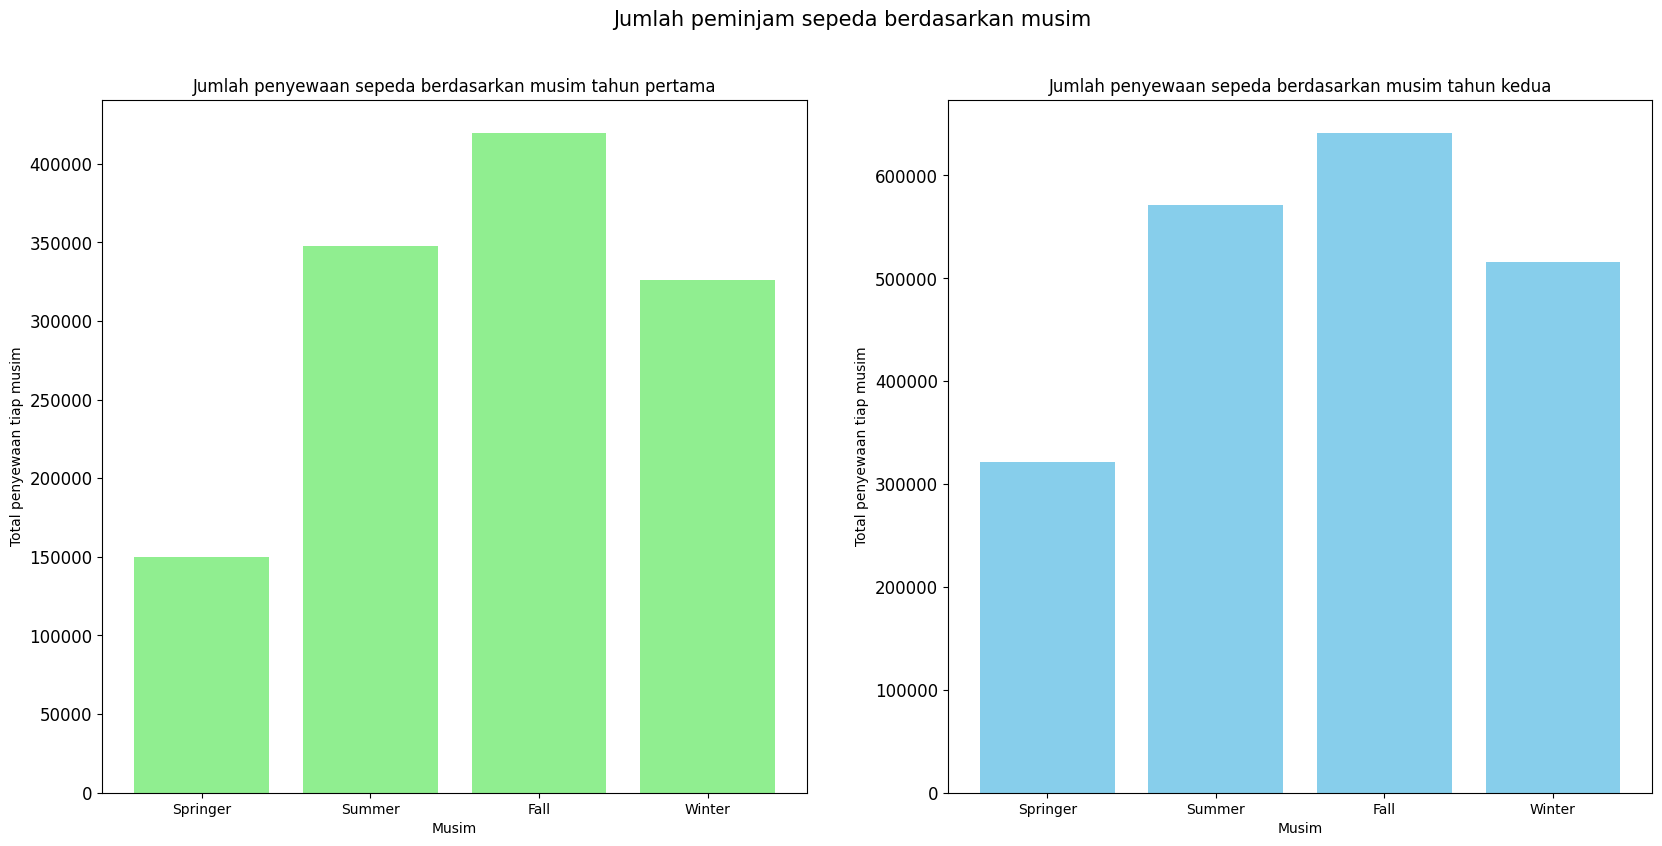

In [89]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 9))


season_name = ['Springer', 'Summer', 'Fall', 'Winter']

ax[0].bar(daydf_byseason[daydf_byseason['yr'] == 0]['season'], daydf_byseason[daydf_byseason['yr'] == 0 ]['cnt'], color='lightgreen')
ax[0].set_title('Jumlah penyewaan sepeda berdasarkan musim tahun pertama')
ax[0].set_xlabel('Musim')
ax[0].set_ylabel('Total penyewaan tiap musim')
ax[0].set_xticks(range(1, 5))
ax[0].set_xticklabels(season_name)
ax[0].tick_params(axis='y', labelsize=12)

ax[1].bar(daydf_byseason[daydf_byseason['yr'] == 1]['season'], daydf_byseason[daydf_byseason['yr'] == 1 ]['cnt'], color='skyblue')
ax[1].set_title('Jumlah penyewaan sepeda berdasarkan musim tahun kedua')
ax[1].set_xlabel('Musim')
ax[1].set_ylabel('Total penyewaan tiap musim')
ax[1].set_xticks(range(1, 5))
ax[1].set_xticklabels(season_name)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle('Jumlah peminjam sepeda berdasarkan musim', fontsize=15)
plt.show()

#### Pada waktu apa user lebih sering menyewa sepeda?

In [90]:
hourdf_byhour = hour_df.groupby(by=['yr', 'time_category']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()
hourdf_byhour

,yr,time_category,casual,registered,cnt
0,0,Afternoon,54064,276355,330419
1,0,Day,101857,257374,359231
2,0,Morning,59502,319465,378967
3,0,Night,31829,142657,174486
4,1,Afternoon,80157,462845,543002
5,1,Day,164103,432548,596651
6,1,Morning,86121,548740,634861
7,1,Night,42384,232678,275062


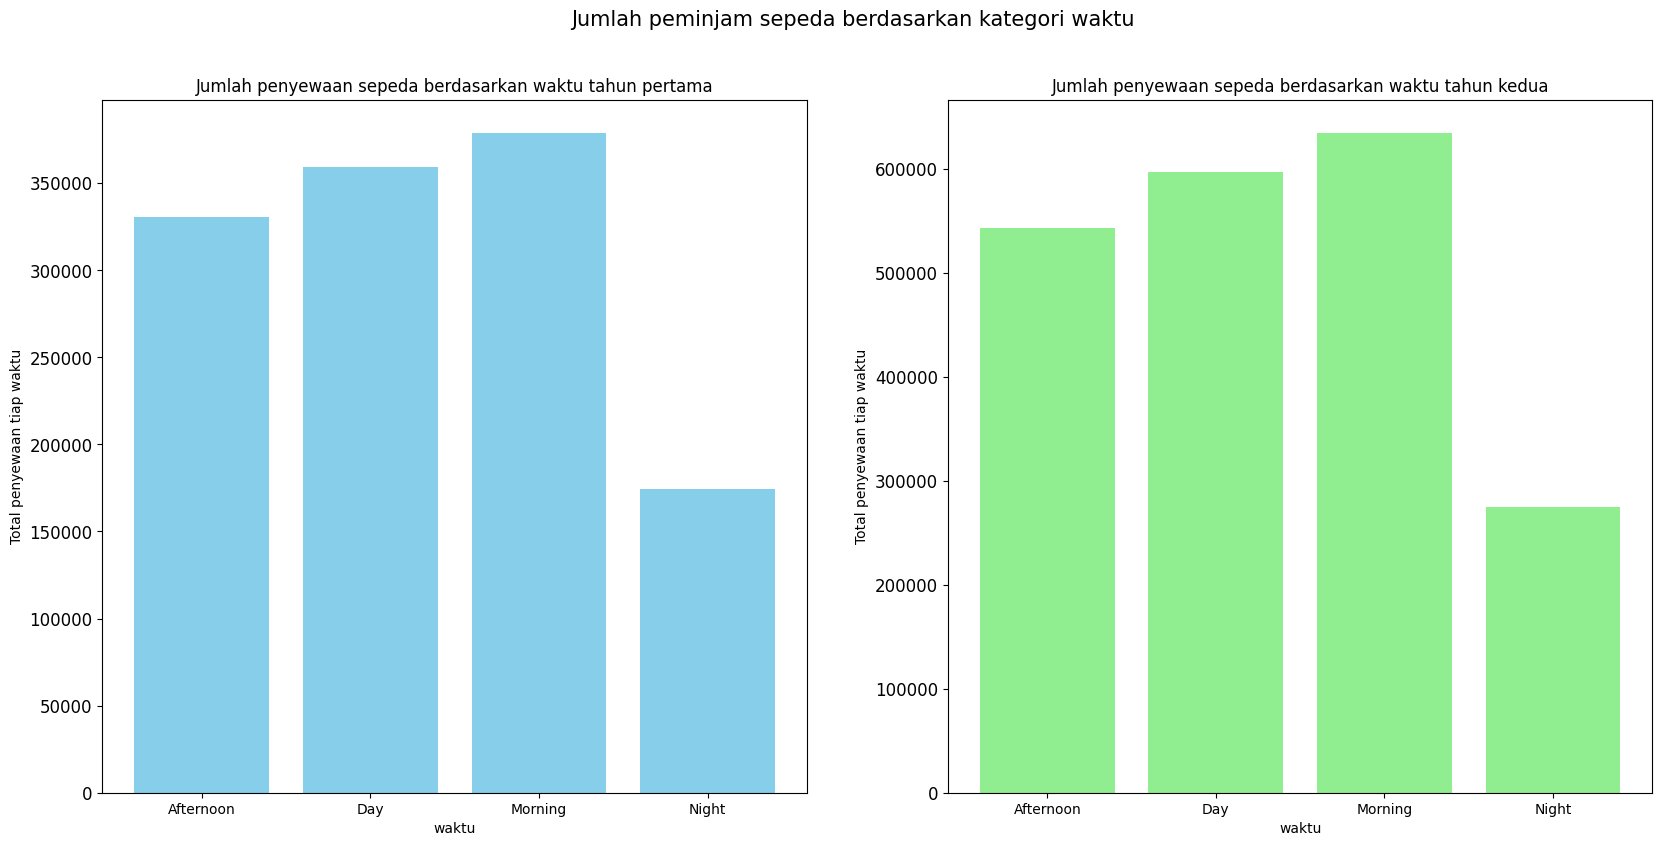

In [91]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 9))


# category_name = ['Morning', 'Day', 'Afternoon', 'Night']

ax[0].bar(hourdf_byhour[hourdf_byhour['yr'] == 0]['time_category'], hourdf_byhour[hourdf_byhour['yr'] == 0 ]['cnt'], color='skyblue')
ax[0].set_title('Jumlah penyewaan sepeda berdasarkan waktu tahun pertama')
ax[0].set_xlabel('waktu')
ax[0].set_ylabel('Total penyewaan tiap waktu')
# ax[0].set_xticks(range(0, 4))
# ax[0].set_xticklabels(category_name)
ax[0].tick_params(axis='y', labelsize=12)

ax[1].bar(hourdf_byhour[hourdf_byhour['yr'] == 1]['time_category'], hourdf_byhour[hourdf_byhour['yr'] == 1 ]['cnt'], color='lightgreen')
ax[1].set_title('Jumlah penyewaan sepeda berdasarkan waktu tahun kedua')
ax[1].set_xlabel('waktu')
ax[1].set_ylabel('Total penyewaan tiap waktu')
# ax[1].set_xticks(range(0, 4))
# ax[1].set_xticklabels(category_name)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle('Jumlah peminjam sepeda berdasarkan kategori waktu', fontsize=15)
plt.show()

In [94]:
day_df.to_csv('main.csv')

**Insight:**
- jumlah penyewaan user casual pada tahun pertama mengalami peningkatan dari bulan Februari hingga Juli kemudian mengalami penurunan hingga akhir tahun pertama.

- jumlah penyewaan user casual pada tahun kedua mengalami peningkatan di bulan Maret hingga bulan September walaupun tidak terlalu signifikan.

- Jumlah penyewaan user registered pada tahun pertama mengalami peningkatan dari bulan Februari hingga yang tertinggi di bulan Juni lalu jumlahnya menurun hingga akhir tahun pertama.

- Jumlah penyewaan user registered pada tahun kedua mengalami peningkatan Yang cukup signifikan dari bulan Februari hingga September kemudian jumlahnya menurun hingga akhir tahun kedua.

- Jumlah orang yang menyewa sepeda tertinggi adalah pada musim gugur dan yang paling rendah ada di musim semi.
- Jumlah orang yang menyewa sepeda tertinggi adalah pada saat waktu sore dan yang paling rendah ketika di malam hari.


## Conclusion

- Bagaimana perbandingan jumlah user casual dan user registered tiap bulannya?  
  Jumlah total penyewaan user registered jauh lebih banyak dibandingkan user casual.  
  Dengan rata-rata pertahun :
    - Rata-rata user casual:  848.0
    - Rata-rata user registered:  3656.0

- Apakah perubahan musim mempengaruhi jumlah orang yang menyewa sepeda?  
  Perubahan musim tidak terlalu mempengaruhi jumlah orang yang menyewa sepeda kecuali di musim semi, jumlah penyewaan sepeda sangat kecil pada musim semi.
    - Pada musim semi tahun pertama: 150000
    - Pada musim semi tahun kedua: 321348
  Saran: Perusahaan bisa membuat event yang menarik di musim semi untuk menaikkan angka penyewaan. 

- Pada waktu apa user lebih sering menyewa sepeda?  
  User lebih sering menyewa sepeda di pagi hari, dan jumlah terkecil penyewaan sepeda ada di malam hari.  
    
    Pada tahun pertama:
    * Pagi hari : 378967
    * Malam hari : 174486  

    Pada tahun kedua:
    * Sore hari : 634861
    * Malam hari : 174486
  
  Kemungkinan angka di pagi hari yang tinggi dikarenakan user berangkat kerja, dan rendah di malam hari dikarenakan user sudah pulang ke rumah.